# Bike Sharing Assignment
### 
### reading and understaning data sets


In [2]:
# surpassing warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# importing liberaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn library
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

# statmodel 
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [4]:
# read the data using pandas liberary
bike_df = pd.read_csv("day.csv")

In [5]:
# Have a look on data
bike_df.head(20)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [6]:
# cheking the descriptive information 
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
bike_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [9]:
# cheking the shape ogf data set
bike_df.shape

(730, 16)

### findings
  1) In data set have 730 rows and 16 columns
  
  2) all the columns have float or int type except 1 column have date type.
  

### Checking null or missing values in dataset

In [10]:
# cheking in columns for null data
bike_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [11]:
# checking for rows null or missing data
bike_df.isnull().sum(axis=1)

0      0
1      0
2      0
3      0
4      0
      ..
725    0
726    0
727    0
728    0
729    0
Length: 730, dtype: int64

In [12]:
# cheking for duplicate rows and dropping them
bike_df.drop_duplicates(subset=None, inplace=True)
bike_df.shape

(730, 16)

### Finidings 
1) In data frame any columns and rows not contaning any null value or not have any missing values

2) And didn't persent any duplicate columns

## Data Cleaning

In [13]:
# checking value_counts() in all data frames for identify junk or unknown vlaues
# We no need to check for instant column we know its have all unique values so we create a duplicate data frame

bike_df1 =bike_df.iloc[:,1:16]


In [14]:
for col in bike_df1:
    print(bike_df1[col].value_counts(ascending=False), '\n\n\n\n\n')

01-01-2018    1
25-04-2019    1
27-04-2019    1
28-04-2019    1
29-04-2019    1
             ..
03-09-2018    1
04-09-2018    1
05-09-2018    1
06-09-2018    1
31-12-2019    1
Name: dteday, Length: 730, dtype: int64 





3    188
2    184
1    180
4    178
Name: season, dtype: int64 





0    365
1    365
Name: yr, dtype: int64 





1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64 





0    709
1     21
Name: holiday, dtype: int64 





6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: weekday, dtype: int64 





1    499
0    231
Name: workingday, dtype: int64 





1    463
2    246
3     21
Name: weathersit, dtype: int64 





26.035000    5
10.899153    5
27.880000    4
28.563347    4
23.130847    4
            ..
27.435847    1
26.376653    1
28.989419    1
28.700000    1
8.849153     1
Name: temp, Length: 498, dtype: int64 





32.73440    4
18.78105    3
31.85040    3
28.5

In [15]:
bike_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

### findings 
after analysing above output we able to tell that in the data frame not persent any junk value

### removing unwanted data columns
1) instant - its repesenting index value so we don't need this column for analysis

2) dteday - its repersenting date for that we have another columns mnth, yr and weekdays and workingday so we no need this data 

3) casual and  registered - both are repersent the no. of count of bikes in differnt category but we have already one another column which is repersent total no. of count booked bike so we no need to take care of different category no .of coun ts booked bike.


In [16]:
# creating new data_frame for after dropping these columns
bike_df_new=bike_df[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt']]

In [17]:
bike_df_new.shape

(730, 12)

In [18]:
bike_df_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [19]:
 bike_df_new.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
season,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,-0.003081,0.013762,0.021306,0.333361,0.342014,0.208220,-0.229607,0.404584
yr,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,-0.005466,-0.002945,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.569728
mnth,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,0.009523,-0.004688,0.045613,0.219083,0.226430,0.224937,-0.208013,0.278191
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.101962,-0.252948,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
weekday,-3.081198e-03,-5.466369e-03,9.522969e-03,-0.101962,1.000000,0.035800,0.031112,-0.000168,-0.007539,-0.052290,0.014283,0.067534
workingday,1.376178e-02,-2.945396e-03,-4.687953e-03,-0.252948,0.035800,1.000000,0.060236,0.053470,0.052940,0.023202,-0.018666,0.062542
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.031112,0.060236,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.295929
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,-0.000168,0.053470,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,-0.007539,0.052940,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,-0.052290,0.023202,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.098543


#### we able to identify using data_dictionery that 'mnth', 'weekday', 'season' & 'weathersit' are the categorical variable but we able to see that its all are numerical value so we need to change them in categorical values.

### visualising data 
1) visualising numerical data using pairplot

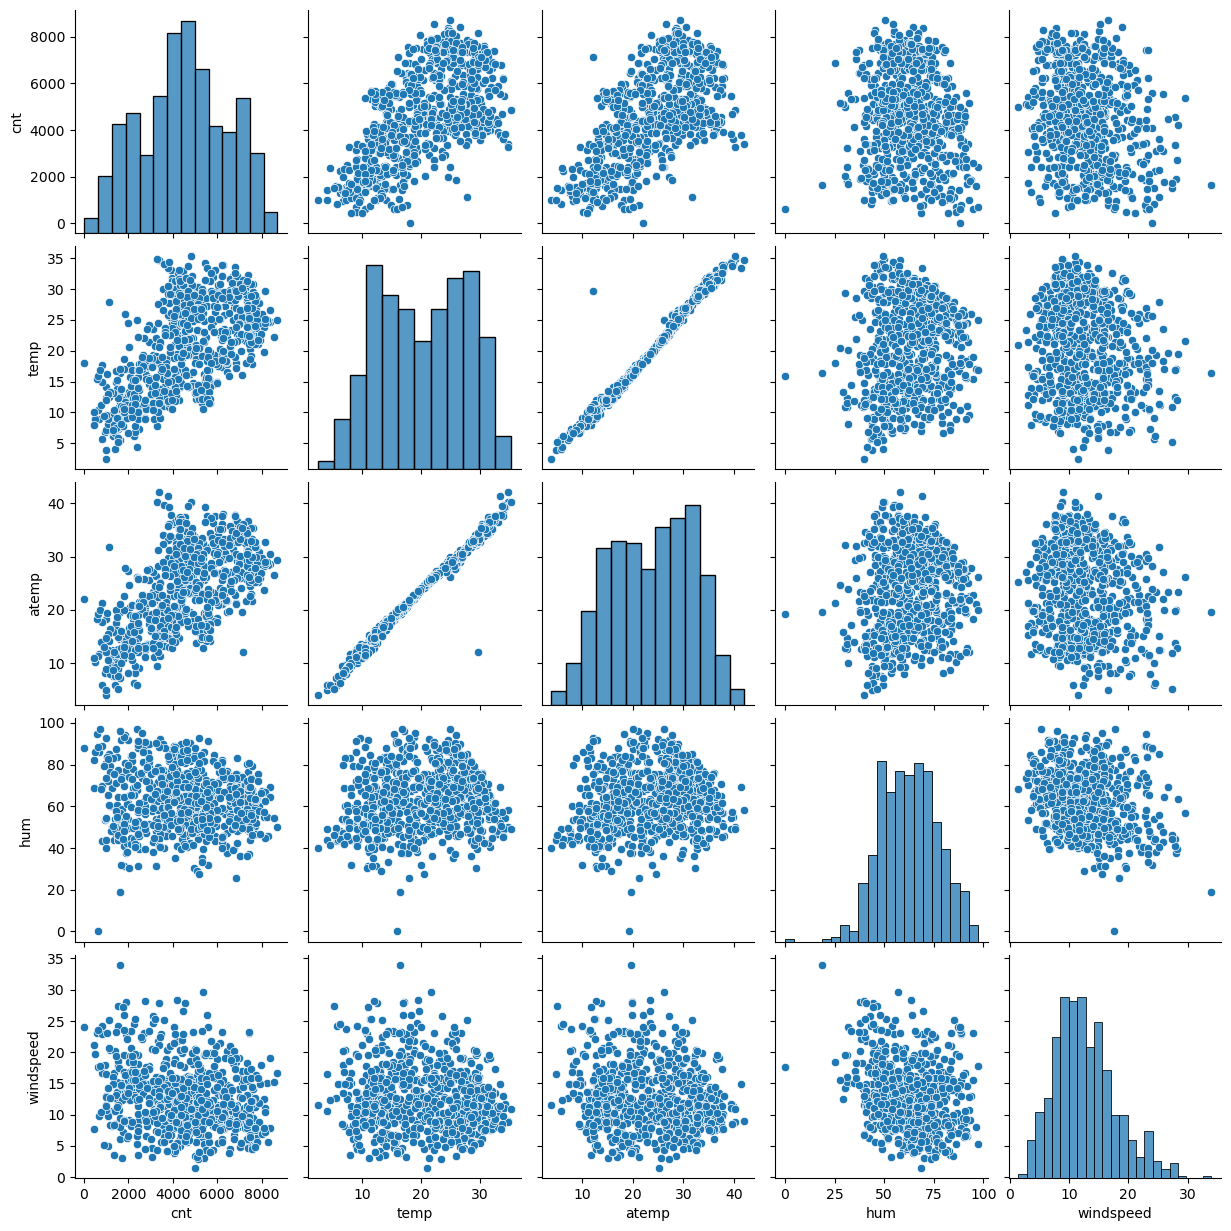

In [20]:
sns.pairplot(data = bike_df_new, vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

### findings 
we able to visualise thatr temp ant atemp are showing liner relationship with target varaible cnt and positive corelation so we considere here liner model is possible.

2) visualising categorical data using boxplot

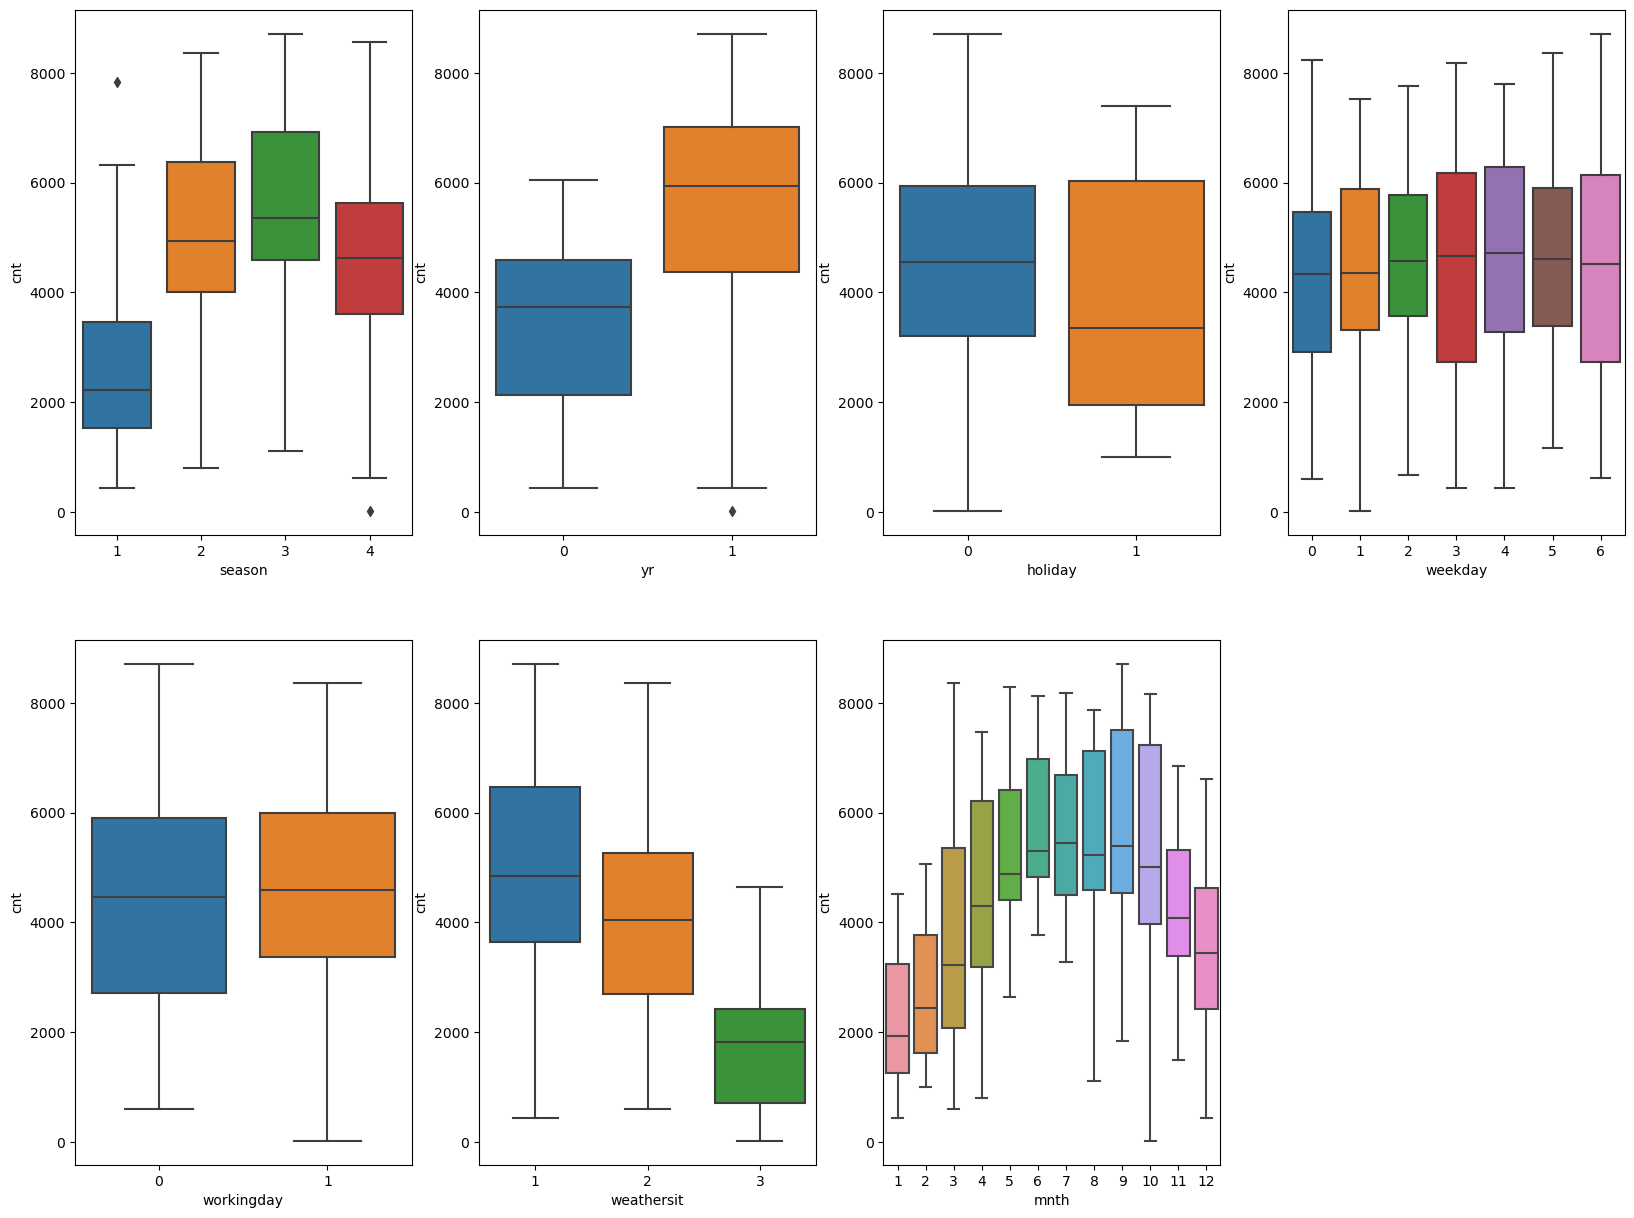

In [21]:
plt.figure(figsize=(20, 15))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_df_new)
plt.subplot(2,4,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_df_new)
plt.subplot(2,4,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_df_new)
plt.subplot(2,4,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_df_new)
plt.subplot(2,4,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_df_new)
plt.subplot(2,4,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_df_new)
plt.subplot(2,4,7)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_df_new)
plt.show()

### Findings 
1) we able to seen that in season3 have highest booking and in season1 have lowest booking  so we consider this varible as a predictor varible in module.

2) We able to seen that in month 4,5,6,7,8,9 and 10 have more bookings respect to other months so its also consider as a pradictor variable.

3) And in holidays bike booking is less repect to non_holidays also consider as a predictor.

4) And in weekdays the bike booking is almost constatnt.

5) And in workingdays have more bike bookings repect to non working days.

6) And in clear weather have more bookings repect to others.

7) we able to see that in year 2018 have lowest booking respect to 2019 so its increasing year to year.


##### converting categorical numerical values with respective string values

In [22]:
bike_df_new.mnth = bike_df_new.mnth.map({1:"Jan",2:"Feb",3:"March",4:"Apl",5:"May",6:"Jun",7:"Jly",8:"Aug",9:"Sep",10:"Oct",11:"Nov",12:"Dec"})
#bike_df_new.

In [23]:
bike_df_new.weekday = bike_df_new.weekday.map({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thrusday",5:"Friday",6:"Saturday"})


In [24]:

bike_df_new.weathersit = bike_df_new.weathersit.map({1:'Clear',2:'Mist & Cloudy', 
                                             3:'Light Snow & Rain',4:'Heavy Snow & Rain'})

In [25]:
bike_df_new.season = bike_df_new.season.map({1: 'Spring',2:'Summer',3:'Fall',4:'Winter'})


In [26]:
# Check the dataframe now


bike_df_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Saturday,0,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Sunday,0,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [27]:
bike_df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 90.3+ KB


#### creating Dummy variables and dropping original columns and taking n-1 dummy varaibles so need to drop one dummy varable for all categorical varaible

In [28]:
# creating dummy varaiable dataframe for operations
df = bike_df_new[['season','mnth','weekday','weathersit']]
df.head()

,season,mnth,weekday,weathersit
0,Spring,Jan,Saturday,Mist & Cloudy
1,Spring,Jan,Sunday,Mist & Cloudy
2,Spring,Jan,Monday,Clear
3,Spring,Jan,Tuesday,Clear
4,Spring,Jan,Wednesday,Clear


In [29]:
# creating dummy varables and dropping first dummy variable
df = pd.get_dummies(df,drop_first=True )
df.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jly,mnth_Jun,mnth_March,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [30]:
# Adding the dummy variables to the original dataset
bike_df_new = pd.concat([df,bike_df_new],axis = 1)
bike_df_new.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jly,mnth_Jun,mnth_March,...,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Saturday,0,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Sunday,0,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [31]:
bike_df_new.shape

(730, 34)

In [32]:
bike_df_new.columns

Index(['season_Spring', 'season_Summer', 'season_Winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jly', 'mnth_Jun',
       'mnth_March', 'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep',
       'weekday_Monday', 'weekday_Saturday', 'weekday_Sunday',
       'weekday_Thrusday', 'weekday_Tuesday', 'weekday_Wednesday',
       'weathersit_Light Snow & Rain', 'weathersit_Mist & Cloudy', 'season',
       'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp',
       'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [33]:
#Deleting the orginal columns season.weathersit,weekday,mnth
bike_df_new.drop(['season'],axis=1,inplace=True)
bike_df_new.drop(['weathersit'],axis=1,inplace=True)

bike_df_new.drop(['weekday'],axis=1,inplace=True)

bike_df_new.drop(['mnth'],axis=1,inplace=True)


bike_df_new.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jly,mnth_Jun,mnth_March,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,9.305237,11.46350,43.6957,12.522300,1600


In [34]:
bike_df_new.shape

(730, 30)

In [35]:
bike_df_new.columns

Index(['season_Spring', 'season_Summer', 'season_Winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jly', 'mnth_Jun',
       'mnth_March', 'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep',
       'weekday_Monday', 'weekday_Saturday', 'weekday_Sunday',
       'weekday_Thrusday', 'weekday_Tuesday', 'weekday_Wednesday',
       'weathersit_Light Snow & Rain', 'weathersit_Mist & Cloudy', 'yr',
       'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

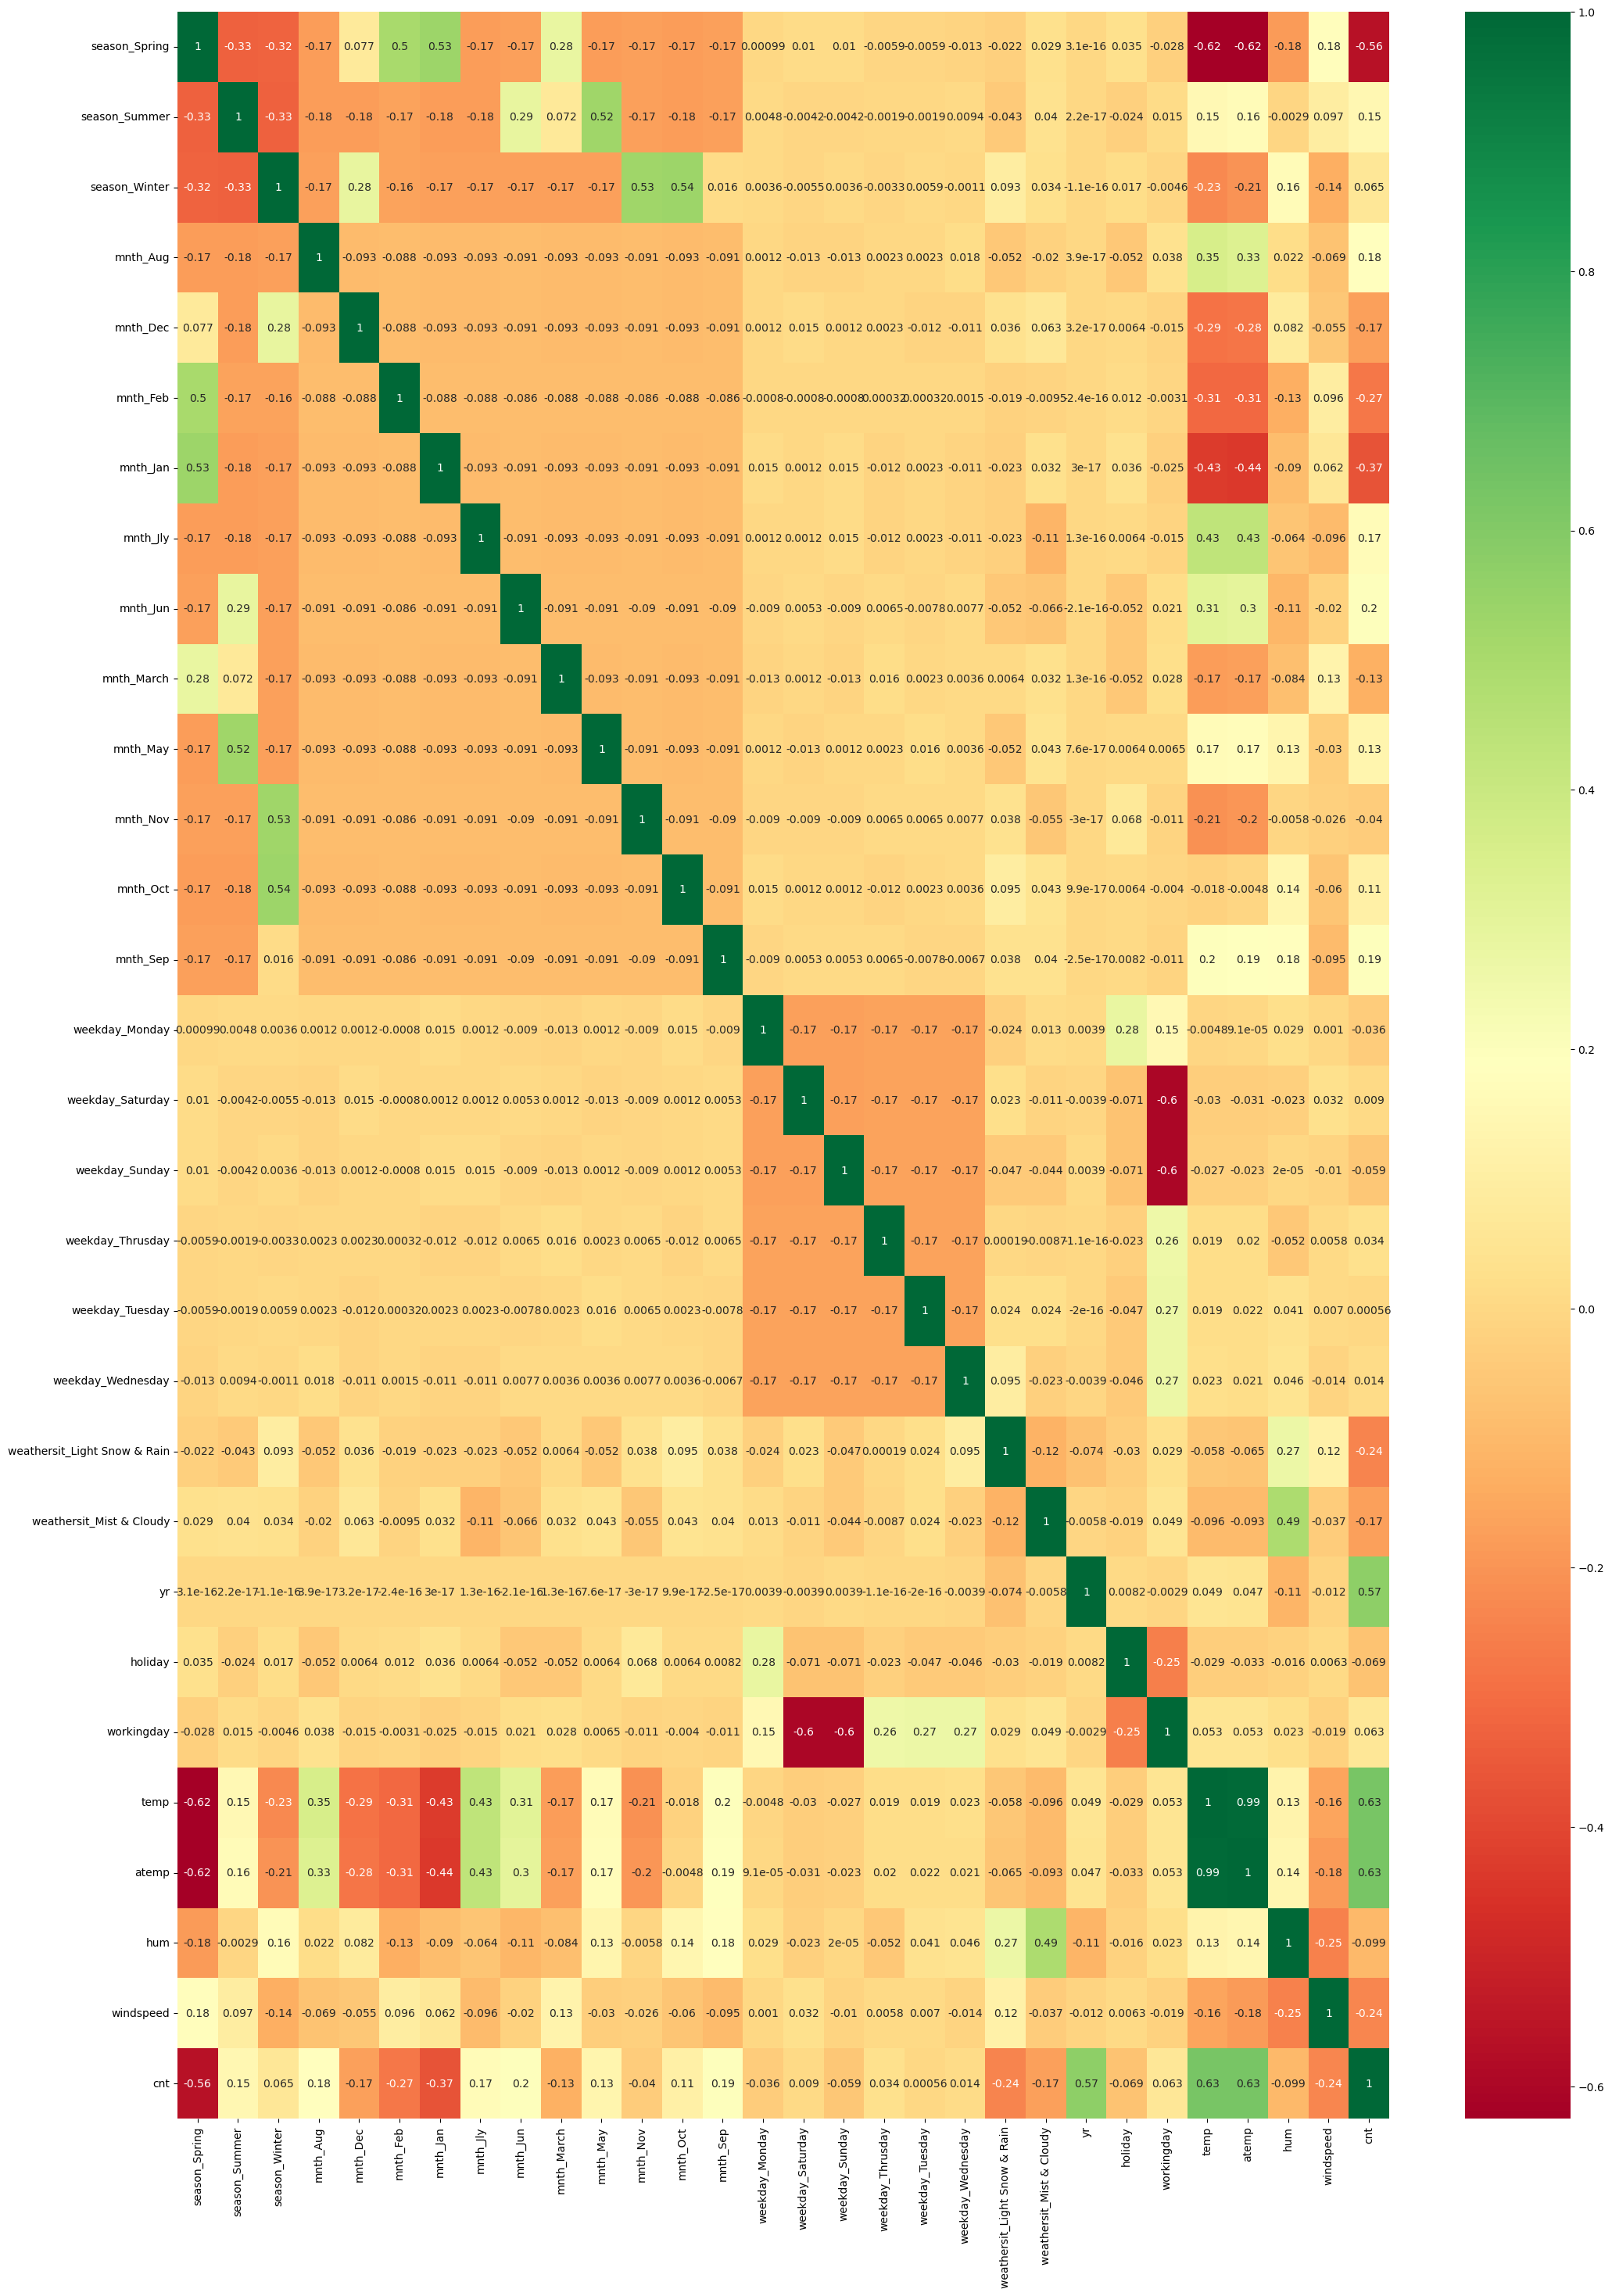

In [36]:
# checking that whcich coffiecient is highly correrelated 
plt.figure(figsize = (25,35))
sns.heatmap(bike_df_new.corr(), annot = True, cmap="RdYlGn")
plt.show()

we able to seen that only temp and atemp showing linerity with cnt variable.

### Splitting the Data into Training and Testing Sets

In [37]:
#y to contain only target variable
y=bike_df_new.pop('cnt')

#X is all remainign variable also our independent variables
x=bike_df_new

#Train Test split with 70:30 ratio
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)

In [38]:
x.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jly,mnth_Jun,mnth_March,...,weekday_Wednesday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed
0,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,14.110847,18.18125,80.5833,10.749882
1,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,8.050924,9.47025,43.7273,16.636703
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,8.200000,10.60610,59.0435,10.739832
4,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,1,9.305237,11.46350,43.6957,12.522300


In [39]:
# checking shape of test and train data_frame
x_train.shape

(511, 29)

In [40]:
x_test.shape

(219, 29)

In [41]:
# scaling contiuous numerical variable
num_cnt_vars = ['temp','atemp','hum','windspeed']



In [42]:
#Using Normalized scaler for scaling 
scaler = MinMaxScaler()

#Fit and transform training set only
x_train[num_cnt_vars] = scaler.fit_transform(x_train[num_cnt_vars])

In [43]:
x_train.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jly,mnth_Jun,mnth_March,...,weekday_Wednesday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed
653,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0.509887,0.501133,0.575354,0.300794
576,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,1,0.815169,0.766351,0.725633,0.264686
426,1,0,0,0,0,0,0,0,0,1,...,0,0,1,1,0,0,0.442393,0.438975,0.640189,0.255342
728,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0.245101,0.200348,0.498067,0.663106
482,0,1,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0.395666,0.391735,0.504508,0.188475


In [44]:
x_train.describe()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jly,mnth_Jun,mnth_March,...,weekday_Wednesday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,...,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.242661,0.246575,0.248532,0.095890,0.084149,0.066536,0.088063,0.076321,0.076321,0.097847,...,0.158513,0.029354,0.344423,0.508806,0.025440,0.677104,0.537386,0.513133,0.650333,0.320844
std,0.429112,0.431440,0.432585,0.294729,0.277883,0.249461,0.283664,0.265771,0.265771,0.297399,...,0.365579,0.168963,0.475645,0.500412,0.157613,0.468042,0.225640,0.212202,0.145741,0.169639
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.341151,0.332910,0.538858,0.199179
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.542077,0.529300,0.653499,0.298098
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.735215,0.688457,0.754401,0.414438
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


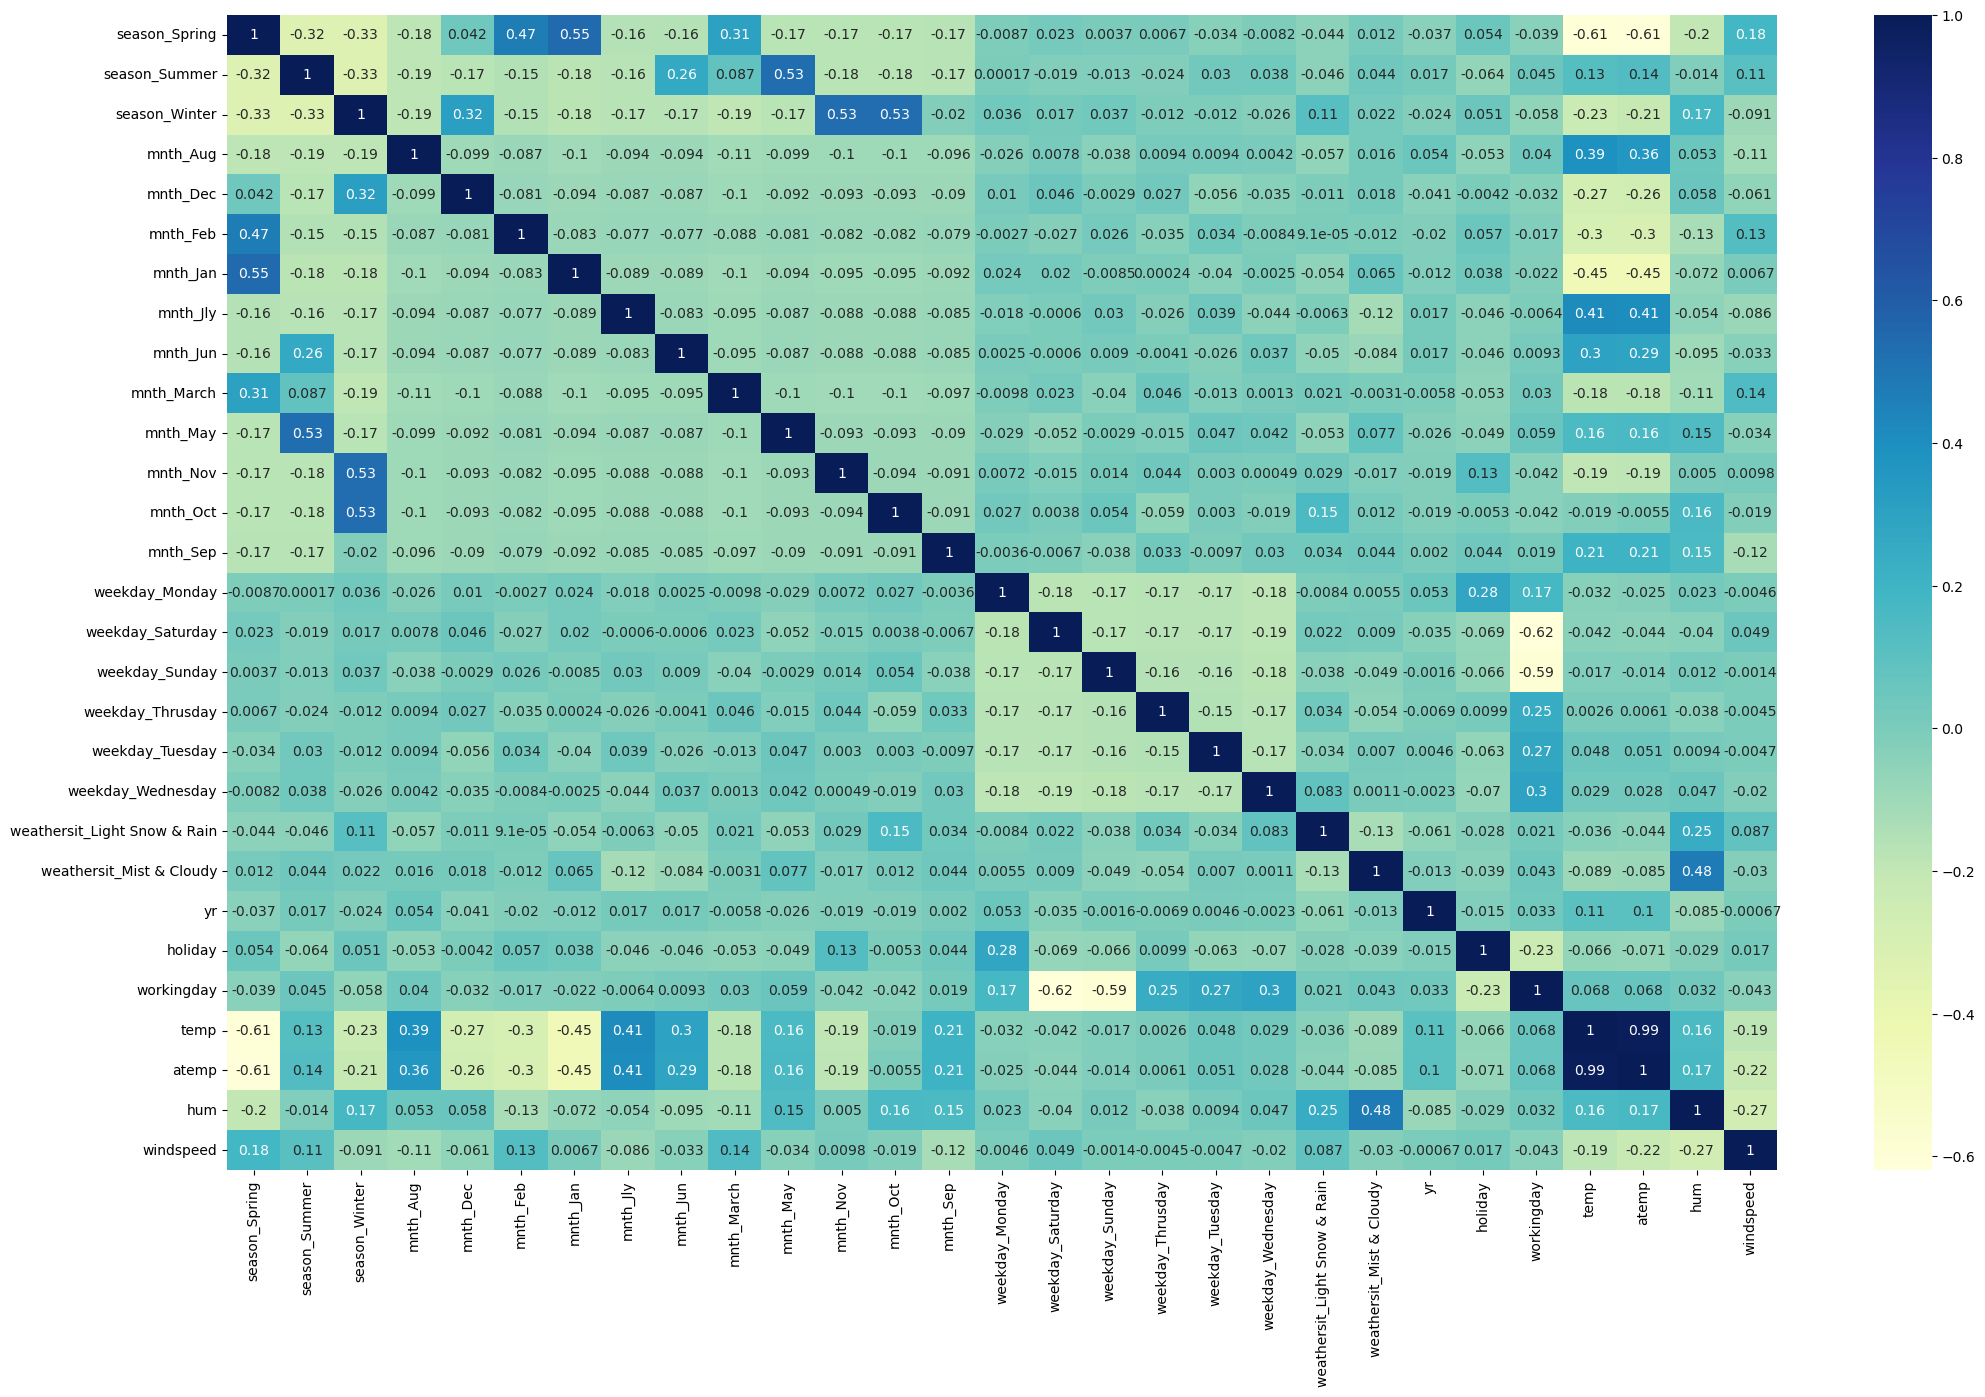

In [147]:
#Checking if the variables are highly correlated
plt.figure(figsize = (25, 15))  
sns.heatmap(x_train.corr(), annot = True,cmap="YlGnBu")
plt.show()


Here we using mix model apporach starting for 15 varibles its reucing automatically by RFE

In [148]:
# automaticly reducing the varible till 15

lr = LinearRegression()
lr.fit(x_train, y_train)




LinearRegression()

In [149]:
rfe1 = RFE(lr, n_features_to_select=15,step=1)      
rfe1 = rfe1.fit(x_train,y_train)

In [150]:
#Columns selected by RFE and their weights
list(zip(x_train.columns,rfe1.support_,rfe1.ranking_))

[('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('mnth_Aug', False, 7),
 ('mnth_Dec', False, 3),
 ('mnth_Feb', False, 4),
 ('mnth_Jan', True, 1),
 ('mnth_Jly', True, 1),
 ('mnth_Jun', False, 14),
 ('mnth_March', False, 15),
 ('mnth_May', False, 6),
 ('mnth_Nov', False, 2),
 ('mnth_Oct', False, 11),
 ('mnth_Sep', True, 1),
 ('weekday_Monday', False, 9),
 ('weekday_Saturday', True, 1),
 ('weekday_Sunday', False, 8),
 ('weekday_Thrusday', False, 12),
 ('weekday_Tuesday', False, 10),
 ('weekday_Wednesday', False, 13),
 ('weathersit_Light Snow & Rain', True, 1),
 ('weathersit_Mist & Cloudy', True, 1),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1)]

In [151]:
# column supported by rfe-
col = x_train.columns[rfe1.support_]
col



Index(['season_Spring', 'season_Summer', 'season_Winter', 'mnth_Jan',
       'mnth_Jly', 'mnth_Sep', 'weekday_Saturday',
       'weathersit_Light Snow & Rain', 'weathersit_Mist & Cloudy', 'yr',
       'holiday', 'workingday', 'temp', 'hum', 'windspeed'],
      dtype='object')

In [152]:
# column not supported by rfe-
x_train.columns[~rfe1.support_]

Index(['mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jun', 'mnth_March',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'weekday_Monday', 'weekday_Sunday',
       'weekday_Thrusday', 'weekday_Tuesday', 'weekday_Wednesday', 'atemp'],
      dtype='object')

### building a model 

###  Model 1

In [153]:
# Creating x_test dataframe with RFE selected variables
x_train_rfe_m = x_train[col]

In [154]:
# adding constant varaible 
x_train_rfe = sm.add_constant(x_train_rfe_m)

In [155]:
x_train_rfe.head()

,const,season_Spring,season_Summer,season_Winter,mnth_Jan,mnth_Jly,mnth_Sep,weekday_Saturday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,hum,windspeed
653,1.0,0,0,1,0,0,0,0,0,0,1,0,1,0.509887,0.575354,0.300794
576,1.0,0,0,0,0,1,0,0,0,0,1,0,1,0.815169,0.725633,0.264686
426,1.0,1,0,0,0,0,0,1,0,1,1,0,0,0.442393,0.640189,0.255342
728,1.0,1,0,0,0,0,0,0,0,0,1,0,0,0.245101,0.498067,0.663106
482,1.0,0,1,0,0,0,0,1,0,1,1,0,0,0.395666,0.504508,0.188475


In [156]:
# running the liner regression model
lm_1 = sm.OLS(y_train,x_train_rfe).fit()
# Checkig the parameters 
lm_1.params

const                           2206.769123
season_Spring                   -439.377949
season_Summer                    442.313613
season_Winter                    823.339666
mnth_Jan                        -298.475308
mnth_Jly                        -461.813616
mnth_Sep                         705.896737
weekday_Saturday                 466.036261
weathersit_Light Snow & Rain   -2154.607322
weathersit_Mist & Cloudy        -492.145577
yr                              2007.664290
holiday                         -506.781325
workingday                       380.706107
temp                            4437.974485
hum                            -1366.605667
windspeed                      -1619.136604
dtype: float64

In [157]:
# cheking summery
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.5
Date:                Sun, 12 Mar 2023   Prob (F-statistic):          1.50e-191
Time:                        15:53:50   Log-Likelihood:                -4114.8
No. Observations:                 511   AIC:                             8262.
Df Residuals:                     495   BIC:                             8329.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [158]:
# cheking mulcolinerity using VIF 
vif = pd.DataFrame()
X = x_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,84.76
1,season_Spring,5.09
13,temp,3.89
3,season_Winter,3.60
2,season_Summer,2.65
14,hum,1.91
12,workingday,1.88
7,weekday_Saturday,1.78
4,mnth_Jan,1.57
9,weathersit_Mist & Cloudy,1.57


we able to see that mnth_jan have high p_value so we going to droping this varaible and rebuilding model

###  Model 2

In [159]:
# dropping `mnth_jan` column as the p value  have higher
x_train_rfe_m = x_train_rfe_m.drop(['mnth_Jan'], axis=1)
x_train_rfe_m.columns

Index(['season_Spring', 'season_Summer', 'season_Winter', 'mnth_Jly',
       'mnth_Sep', 'weekday_Saturday', 'weathersit_Light Snow & Rain',
       'weathersit_Mist & Cloudy', 'yr', 'holiday', 'workingday', 'temp',
       'hum', 'windspeed'],
      dtype='object')

In [160]:
x_train_rfe.head()

,const,season_Spring,season_Summer,season_Winter,mnth_Jan,mnth_Jly,mnth_Sep,weekday_Saturday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,hum,windspeed
653,1.0,0,0,1,0,0,0,0,0,0,1,0,1,0.509887,0.575354,0.300794
576,1.0,0,0,0,0,1,0,0,0,0,1,0,1,0.815169,0.725633,0.264686
426,1.0,1,0,0,0,0,0,1,0,1,1,0,0,0.442393,0.640189,0.255342
728,1.0,1,0,0,0,0,0,0,0,0,1,0,0,0.245101,0.498067,0.663106
482,1.0,0,1,0,0,0,0,1,0,1,1,0,0,0.395666,0.504508,0.188475


In [161]:
x_train_rfe = sm.add_constant(x_train_rfe_m)


# running the liner regression model
lm_2 = sm.OLS(y_train,x_train_rfe).fit()
# Checkig the parameters 
print(lm_2.params)
# cheking summery
print(lm_2.summary())


const                           2105.359366
season_Spring                   -479.617909
season_Summer                    467.998704
season_Winter                    874.367693
mnth_Jly                        -476.489575
mnth_Sep                         710.999776
weekday_Saturday                 461.530062
weathersit_Light Snow & Rain   -2133.340103
weathersit_Mist & Cloudy        -492.342285
yr                              2001.023387
holiday                         -514.645783
workingday                       378.057799
temp                            4594.348413
hum                            -1407.931931
windspeed                      -1572.571287
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.2
Date:    

In [162]:
# cheking mulcolinerity using VIF 
cols = ['season_Spring', 'season_Summer', 'season_Winter', 'mnth_Jly',
       'mnth_Sep', 'weekday_Saturday', 'weathersit_Light Snow & Rain',
       'weathersit_Mist & Cloudy', 'yr', 'holiday', 'workingday', 'temp',
       'hum', 'windspeed']
    
    
vif = pd.DataFrame()
X = x_train_rfe[cols]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,hum,28.48
11,temp,17.00
10,workingday,5.30
13,windspeed,4.72
0,season_Spring,4.24
2,season_Winter,3.44
1,season_Summer,2.85
7,weathersit_Mist & Cloudy,2.28
8,yr,2.09
5,weekday_Saturday,1.97


we able to see that hum have high VIF value so we going to droping this varaible and rebuilding model

###  Model 3

In [166]:

# dropping `hum` column as the VIF value  have higher
x_train_rfe_m = x_train_rfe_m.drop(['hum'], axis=1)
x_train_rfe_m.columns

Index(['season_Spring', 'season_Summer', 'season_Winter', 'mnth_Jly',
       'mnth_Sep', 'weekday_Saturday', 'weathersit_Light Snow & Rain',
       'weathersit_Mist & Cloudy', 'yr', 'holiday', 'workingday', 'temp',
       'windspeed'],
      dtype='object')

In [169]:
x_train_rfe_m.head()

,season_Spring,season_Summer,season_Winter,mnth_Jly,mnth_Sep,weekday_Saturday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,windspeed
653,0,0,1,0,0,0,0,0,1,0,1,0.509887,0.300794
576,0,0,0,1,0,0,0,0,1,0,1,0.815169,0.264686
426,1,0,0,0,0,1,0,1,1,0,0,0.442393,0.255342
728,1,0,0,0,0,0,0,0,1,0,0,0.245101,0.663106
482,0,1,0,0,0,1,0,1,1,0,0,0.395666,0.188475


In [170]:
x_train_rfe = sm.add_constant(x_train_rfe_m)


# running the liner regression model
lm_3 = sm.OLS(y_train,x_train_rfe).fit()
# Checkig the parameters 
print(lm_3.params)
# cheking summery
print(lm_3.summary())

const                           1382.982117
season_Spring                   -566.525401
season_Summer                    415.099419
season_Winter                    747.085318
mnth_Jly                        -433.003625
mnth_Sep                         658.038757
weekday_Saturday                 503.925261
weathersit_Light Snow & Rain   -2522.607901
weathersit_Mist & Cloudy        -718.184464
yr                              2035.871534
holiday                         -494.204519
workingday                       405.242590
temp                            4278.430170
windspeed                      -1294.495666
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.7
Date:                Sun, 12 Mar 2023   Prob (F-stati

In [171]:
# cheking mulcolinerity using VIF 
cols = ['season_Spring', 'season_Summer', 'season_Winter', 'mnth_Jly',
       'mnth_Sep', 'weekday_Saturday', 'weathersit_Light Snow & Rain',
       'weathersit_Mist & Cloudy', 'yr', 'holiday', 'workingday', 'temp', 'windspeed']
    
    
vif = pd.DataFrame()
X = x_train_rfe[cols]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,temp,6.98
10,workingday,5.22
12,windspeed,4.66
0,season_Spring,2.49
1,season_Summer,2.34
8,yr,2.07
2,season_Winter,1.99
5,weekday_Saturday,1.96
3,mnth_Jly,1.58
7,weathersit_Mist & Cloudy,1.57


###  Model 4

In [173]:
# dropping `holiday` column as the p value  have higher
x_train_rfe_m = x_train_rfe_m.drop(['holiday'], axis=1)
x_train_rfe_m.columns

Index(['season_Spring', 'season_Summer', 'season_Winter', 'mnth_Jly',
       'mnth_Sep', 'weekday_Saturday', 'weathersit_Light Snow & Rain',
       'weathersit_Mist & Cloudy', 'yr', 'workingday', 'temp', 'windspeed'],
      dtype='object')

In [174]:
x_train_rfe_m.head()

,season_Spring,season_Summer,season_Winter,mnth_Jly,mnth_Sep,weekday_Saturday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,workingday,temp,windspeed
653,0,0,1,0,0,0,0,0,1,1,0.509887,0.300794
576,0,0,0,1,0,0,0,0,1,1,0.815169,0.264686
426,1,0,0,0,0,1,0,1,1,0,0.442393,0.255342
728,1,0,0,0,0,0,0,0,1,0,0.245101,0.663106
482,0,1,0,0,0,1,0,1,1,0,0.395666,0.188475


In [175]:
x_train_rfe = sm.add_constant(x_train_rfe_m)


# running the liner regression model
lm_4 = sm.OLS(y_train,x_train_rfe).fit()
# Checkig the parameters 
print(lm_4.params)
# cheking summery
print(lm_4.summary())

const                           1310.508571
season_Spring                   -574.592149
season_Summer                    418.452239
season_Winter                    740.356576
mnth_Jly                        -423.876437
mnth_Sep                         641.261722
weekday_Saturday                 578.035969
weathersit_Light Snow & Rain   -2512.208066
weathersit_Mist & Cloudy        -713.765297
yr                              2037.401670
workingday                       478.525512
temp                            4282.335496
windspeed                      -1302.065407
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.7
Date:                Sun, 12 Mar 2023   Prob (F-statistic):          2.69e-189
Time:             

In [176]:
# cheking mulcolinerity using VIF 
cols = ['season_Spring', 'season_Summer', 'season_Winter', 'mnth_Jly',
       'mnth_Sep', 'weekday_Saturday', 'weathersit_Light Snow & Rain',
       'weathersit_Mist & Cloudy', 'yr', 'workingday', 'temp', 'windspeed']
    
    
vif = pd.DataFrame()
X = x_train_rfe[cols]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,temp,6.74
9,workingday,4.67
11,windspeed,4.65
0,season_Spring,2.38
1,season_Summer,2.32
8,yr,2.07
2,season_Winter,1.92
5,weekday_Saturday,1.83
3,mnth_Jly,1.58
7,weathersit_Mist & Cloudy,1.57


###  Model 5

In [177]:

# dropping `mnt_july` column as the p value  have higher
x_train_rfe_m = x_train_rfe_m.drop(['mnth_Jly'], axis=1)
x_train_rfe_m.columns

Index(['season_Spring', 'season_Summer', 'season_Winter', 'mnth_Sep',
       'weekday_Saturday', 'weathersit_Light Snow & Rain',
       'weathersit_Mist & Cloudy', 'yr', 'workingday', 'temp', 'windspeed'],
      dtype='object')

In [178]:
x_train_rfe_m.head()

,season_Spring,season_Summer,season_Winter,mnth_Sep,weekday_Saturday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,workingday,temp,windspeed
653,0,0,1,0,0,0,0,1,1,0.509887,0.300794
576,0,0,0,0,0,0,0,1,1,0.815169,0.264686
426,1,0,0,0,1,0,1,1,0,0.442393,0.255342
728,1,0,0,0,0,0,0,1,0,0.245101,0.663106
482,0,1,0,0,1,0,1,1,0,0.395666,0.188475


In [179]:
x_train_rfe = sm.add_constant(x_train_rfe_m)


# running the liner regression model
lm_5 = sm.OLS(y_train,x_train_rfe).fit()
# Checkig the parameters 
print(lm_5.params)
# cheking summery
print(lm_5.summary())

const                           1234.811821
season_Spring                   -478.261685
season_Summer                    545.295972
season_Winter                    845.049144
mnth_Sep                         756.814397
weekday_Saturday                 580.763084
weathersit_Light Snow & Rain   -2520.478607
weathersit_Mist & Cloudy        -702.797555
yr                              2041.828537
workingday                       486.785418
temp                            4174.021919
windspeed                      -1302.665089
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     234.1
Date:                Sun, 12 Mar 2023   Prob (F-statistic):          5.44e-189
Time:                        16:08:54   Log-Likelihood:       

In [180]:
# cheking mulcolinerity using VIF 
cols = ['season_Spring', 'season_Summer', 'season_Winter','mnth_Sep', 'weekday_Saturday', 'weathersit_Light Snow & Rain',
       'weathersit_Mist & Cloudy', 'yr', 'workingday', 'temp', 'windspeed']
    
    
vif = pd.DataFrame()
X = x_train_rfe[cols]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,temp,5.49
8,workingday,4.67
10,windspeed,4.64
0,season_Spring,2.30
7,yr,2.07
1,season_Summer,2.00
4,weekday_Saturday,1.83
2,season_Winter,1.77
6,weathersit_Mist & Cloudy,1.56
3,mnth_Sep,1.23


###  Model 6

Here we able to see that temp variable VIF value is nearest to 5 so we didn't going to droping thi becuase basic undestanidin we know that its have a strong variable so we removing workingdays

In [181]:
# dropping `mnt_july` column as the p value  have higher
x_train_rfe_m = x_train_rfe_m.drop(['workingday'], axis=1)
x_train_rfe_m.columns

Index(['season_Spring', 'season_Summer', 'season_Winter', 'mnth_Sep',
       'weekday_Saturday', 'weathersit_Light Snow & Rain',
       'weathersit_Mist & Cloudy', 'yr', 'temp', 'windspeed'],
      dtype='object')

In [182]:
x_train_rfe = sm.add_constant(x_train_rfe_m)


# running the liner regression model
lm_6 = sm.OLS(y_train,x_train_rfe).fit()
# Checkig the parameters 
print(lm_6.params)
# cheking summery
print(lm_6.summary())

const                           1624.911015
season_Spring                   -497.415666
season_Summer                    545.889006
season_Winter                    810.907027
mnth_Sep                         757.159240
weekday_Saturday                 191.988650
weathersit_Light Snow & Rain   -2453.690755
weathersit_Mist & Cloudy        -675.699837
yr                              2047.165980
temp                            4181.851568
windspeed                      -1320.269568
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     243.1
Date:                Sun, 12 Mar 2023   Prob (F-statistic):          7.81e-185
Time:                        16:27:51   Log-Likelihood:                -4144.7
No. Observations:          

In [183]:

# cheking mulcolinerity using VIF 
cols = ['season_Spring', 'season_Summer', 'season_Winter','mnth_Sep', 'weekday_Saturday', 'weathersit_Light Snow & Rain',
       'weathersit_Mist & Cloudy', 'yr',  'temp', 'windspeed']
    
    
vif = pd.DataFrame()
X = x_train_rfe[cols]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
9,windspeed,4.62
8,temp,3.88
7,yr,2.07
0,season_Spring,1.99
1,season_Summer,1.90
2,season_Winter,1.63
6,weathersit_Mist & Cloudy,1.54
3,mnth_Sep,1.22
4,weekday_Saturday,1.18
5,weathersit_Light Snow & Rain,1.08


###  Model 7

In [184]:
# dropping `weekday_Saturday` column as the p value  have higher
x_train_rfe_m = x_train_rfe_m.drop(['weekday_Saturday'], axis=1)
x_train_rfe_m.columns

Index(['season_Spring', 'season_Summer', 'season_Winter', 'mnth_Sep',
       'weathersit_Light Snow & Rain', 'weathersit_Mist & Cloudy', 'yr',
       'temp', 'windspeed'],
      dtype='object')

In [185]:
x_train_rfe = sm.add_constant(x_train_rfe_m)


# running the liner regression model
lm_7 = sm.OLS(y_train,x_train_rfe).fit()
# Checkig the parameters 
print(lm_7.params)
# cheking summery
print(lm_7.summary())

const                           1658.647204
season_Spring                   -500.854752
season_Summer                    541.483859
season_Winter                    809.873553
mnth_Sep                         756.648843
weathersit_Light Snow & Rain   -2447.770142
weathersit_Mist & Cloudy        -674.241062
yr                              2043.032977
temp                            4169.648701
windspeed                      -1301.107972
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     268.3
Date:                Sun, 12 Mar 2023   Prob (F-statistic):          2.89e-185
Time:                        16:30:27   Log-Likelihood:                -4146.6
No. Observations:                 511   AIC:                           

In [188]:
# cheking mulcolinerity using VIF 
cols6 = ['season_Spring', 'season_Summer', 'season_Winter','mnth_Sep', 'weathersit_Light Snow & Rain',
       'weathersit_Mist & Cloudy', 'yr',  'temp', 'windspeed']
    
    
vif = pd.DataFrame()
X = x_train_rfe[cols6]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,windspeed,4.60
7,temp,3.84
6,yr,2.07
0,season_Spring,1.98
1,season_Summer,1.90
2,season_Winter,1.62
5,weathersit_Mist & Cloudy,1.54
3,mnth_Sep,1.22
4,weathersit_Light Snow & Rain,1.08


Now we able to see that All VIF values are less then 5 and p values also have less then 0.05

Building Final Model

In [198]:
def build_model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1


In [199]:
lr = build_model_sk(x_train_rfe[cols6],y_train)
print(lr.intercept_,lr.coef_)

1658.6472041214165 [ -500.85475206   541.48385864   809.87355268   756.64884321
 -2447.77014153  -674.24106219  2043.03297712  4169.64870118
 -1301.10797249]


residual analysis


In [201]:
y_train_pred = lr.predict(x_train_rfe[cols6])

Text(0.5, 0, 'Errors')

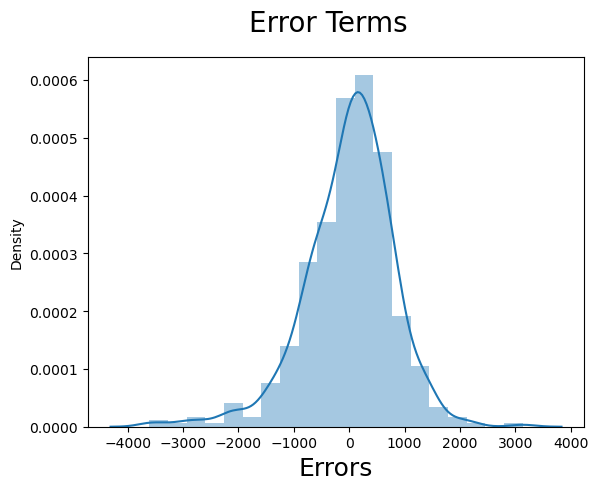

In [204]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)                        

we here clearly able to see that its centered around to 0. and folowwing to nomal distribution so it folllowing the linear regresion model assumption.

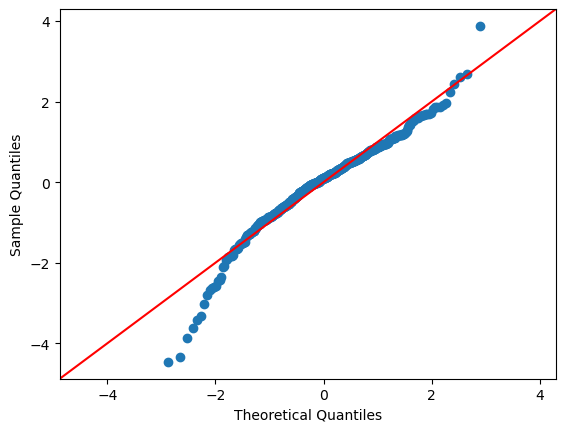

In [205]:
# Plot the qq-plot of the error terms
sm.qqplot((y_train - y_train_pred), fit=True, line='45')
plt.show()

## Model Prediction

r-squared value for test and train 

In [206]:
print(r2_score(y_train,y_train_pred))


0.8281534635789866


In [207]:
# scaling the testing data
num_vars = ['temp','atemp','hum','windspeed']

#Test data to be transformed only, no fitting
x_test[num_vars] = scaler.transform(x_test[num_vars])

In [214]:
y_pred = lr.predict(x_test[cols6])

In [217]:
print(r2_score(y_test,y_pred))

0.8009191634135743


In [218]:
y_pred=y_test_pred
r2_score(y_test, y_pred)

0.8009191634135743

Evaluating the model

Text(0, 0.5, 'y_pred')

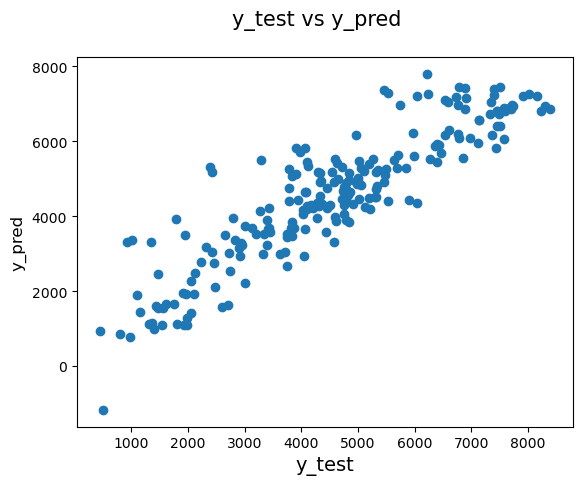

In [219]:
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 15)             
plt.xlabel('y_test', fontsize = 14)                          
plt.ylabel('y_pred', fontsize = 12) 

### Final equation

In [221]:
round(lm_7.params,4)

const                           1658.6472
season_Spring                   -500.8548
season_Summer                    541.4839
season_Winter                    809.8736
mnth_Sep                         756.6488
weathersit_Light Snow & Rain   -2447.7701
weathersit_Mist & Cloudy        -674.2411
yr                              2043.0330
temp                            4169.6487
windspeed                      -1301.1080
dtype: float64

####  cnt = 1658.6472 - 500.8548(season_Spring) +  541.4839(season_Summer) + 809.8736 (season_Winter) +756.6488(mnth_Sep) - 2447.7701(weathersit_Light Snow & Rain) - 674.2411(weathersit_Mist & Cloudy) + 2043.0330(yr)+  4169.6487(temp) -1301.1080 (windspeed)

All the positive coefficients indicate that an increase in these values will  an increase in the value of cnt and the  negative coefficients indicate that an increase in these values will decrease in the value of cnt.

here we clearly visible that temp, summer season, month and yr is the storngly predective veriable

## Conclusion 
followig is the significant varables-
- season_Spring
- season_Summer
- season_Winter
- mnth_Sep
- weathersit_Light Snow & Rain
- weathersit_Mist & Cloudy
- yr
- temp
- windspeed

## Finally Suggestion to company

- Increse the no. of bikes during high temperature 
- Bike demand is increasing during winter season so also increase the bike counts during winter 
- And in month sep and july having high demand so  prepared for this
- It is increasing year by year
